In [1]:
import numpy as np
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
import json

In [2]:
testdata = pd.read_csv('../data/invest_cleaned.csv')
testdata

,company_name,company_lng,company_lat,invested_company_name,invested_company_lng,invested_company_lat,company_registered_address,company_area_code,company_industry_code,invested_company_registered_address,invested_company_area_code,invested_company_industry_code,stock_percentage,should_capi,invest_regi_capi
0,百色市红日房地产开发有限责任公司,106.616688,23.904246,那坡县红日投资实业有限公司,105.840914,23.398263,百色市城北二路１４号,451000,K7010,那坡县城厢镇百马路157-1号,451026,L7212,1.0000,1000.00,1000万
1,佛山市卓信房地产投资发展有限公司,113.214618,23.016514,佛山市恒轮置业投资有限公司,113.028711,22.838297,佛山市南海区桂城街道文华北路23号星晖园综合办公楼五层之一(住所申报),440605,K7010,佛山市南海区九江镇奇山开发区奇腾路9号822室,440605,K7000,0.0550,19.25,350万元人民币
2,重庆绿色产业有限公司,106.468517,29.569209,重庆天演生物技术有限责任公司,106.469771,29.573659,重庆市沙坪坝区沙南街43号,500106,A0190,沙坪坝区沙南街43号7楼,500106,C2761,0.3576,89.40,250万元
3,内蒙古风盛新能源有限公司,111.684023,40.829470,内蒙古金杰科技股份有限公司,109.895208,40.637444,内蒙古自治区呼和浩特市赛罕区新华大街万达广场写字楼A座1306室,150105,D4400,内蒙古自治区包头市白云鄂博矿区稀土路2号蒙古王府旁203房间B,150200,C3400,NaN,NaN,9179万
4,四川诚翔服饰集团有限公司,104.158521,30.635285,四川诚翔纺织品有限公司,104.649891,30.510454,成都市成华区万科北街18号7栋1单元1层1号,510000,F5132,成都市成华区青龙乡站东村四组1幢2层B129号,510108,F5131,0.7000,2100.00,3000万元人民币
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321822,中海企业发展集团有限公司,113.959075,22.539179,宁波中海海富房地产有限公司,121.556526,29.814642,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,浙江省宁波市鄞州区首南街道天童南路555号805室-3,330212,K7010,1.0000,2000.00,2000万元人民币
321823,中海企业发展集团有限公司,113.959075,22.539179,太原中海仲兴房地产开发有限公司,112.536057,37.861494,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,太原市万柏林区晋祠路一段8号9幢1层0101号,140100,K7010,1.0000,5000.00,5000万元人民币
321824,中海企业发展集团有限公司,113.959075,22.539179,北京安泰兴业置业有限公司,116.186529,39.919897,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,北京市石景山区古城西路６６号院１号楼１０１,110107,K7010,1.0000,1000.00,1000万元人民币
321825,中海企业发展集团有限公司,113.959075,22.539179,北京中海地产有限公司,116.807322,40.364279,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,北京市密云区西大桥路69号密云区投资促进局办公楼316室—518,110228,K7010,1.0000,5000.00,5000万元人民币


# enterprise quantity

In [3]:
company=testdata[['company_name','company_industry_code','company_area_code']]
invested_company=testdata[['invested_company_name','invested_company_industry_code','invested_company_area_code']]
company.columns=['company','industry_code','area_code']
company

,company,industry_code,area_code
0,百色市红日房地产开发有限责任公司,K7010,451000
1,佛山市卓信房地产投资发展有限公司,K7010,440605
2,重庆绿色产业有限公司,A0190,500106
3,内蒙古风盛新能源有限公司,D4400,150105
4,四川诚翔服饰集团有限公司,F5132,510000
...,...,...,...
321822,中海企业发展集团有限公司,K7010,440300
321823,中海企业发展集团有限公司,K7010,440300
321824,中海企业发展集团有限公司,K7010,440300
321825,中海企业发展集团有限公司,K7010,440300


In [4]:
invested_company.columns=['company','industry_code','area_code']
invested_company

,company,industry_code,area_code
0,那坡县红日投资实业有限公司,L7212,451026
1,佛山市恒轮置业投资有限公司,K7000,440605
2,重庆天演生物技术有限责任公司,C2761,500106
3,内蒙古金杰科技股份有限公司,C3400,150200
4,四川诚翔纺织品有限公司,F5131,510108
...,...,...,...
321822,宁波中海海富房地产有限公司,K7010,330212
321823,太原中海仲兴房地产开发有限公司,K7010,140100
321824,北京安泰兴业置业有限公司,K7010,110107
321825,北京中海地产有限公司,K7010,110228


In [5]:
all_com=pd.concat([company,invested_company])
all_com=all_com.drop_duplicates(subset=['company'])
all_com

,company,industry_code,area_code
0,百色市红日房地产开发有限责任公司,K7010,451000
1,佛山市卓信房地产投资发展有限公司,K7010,440605
2,重庆绿色产业有限公司,A0190,500106
3,内蒙古风盛新能源有限公司,D4400,150105
4,四川诚翔服饰集团有限公司,F5132,510000
...,...,...,...
321822,宁波中海海富房地产有限公司,K7010,330212
321823,太原中海仲兴房地产开发有限公司,K7010,140100
321824,北京安泰兴业置业有限公司,K7010,110107
321825,北京中海地产有限公司,K7010,110228


In [6]:
# enterprise quantity & industry（S:55-;T:0）

industry=all_com['industry_code'].tolist()
for i in range(len(industry)):
    industry[i]=industry[i][:1]
# print(industry)
a=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R']
b=[]
for i in a:
    b.append(industry.count(i))
print(b)

[16352, 2036, 52457, 5557, 17844, 79708, 9511, 4208, 19237, 10934, 31991, 106602, 37771, 3102, 5043, 578, 808, 3833]


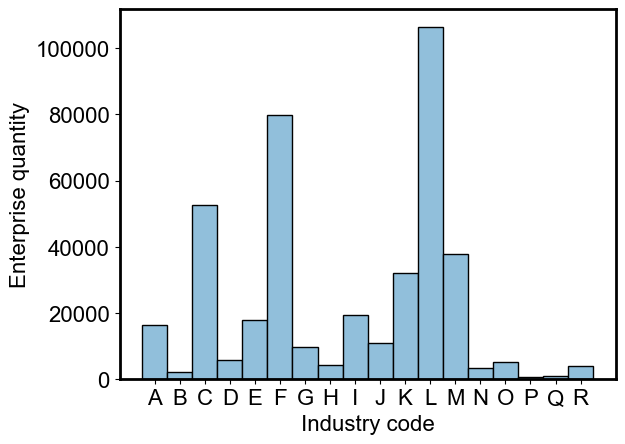

In [7]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(6,4))
plt.rc('font',family='Arial')
plt.bar(a, b, width=1, edgecolor="black",color=['#91bfdb'])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Industry code',fontsize=16)
plt.ylabel('Enterprise quantity',fontsize=16)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

In [8]:
# distribution of enterprises by province

area=all_com['area_code'].tolist()
area=[str(j) for j in area]
for i in range(len(area)):
    area[i]=area[i][:2]
# print(area)
# sf=['京','津','冀','晋','蒙','辽','吉','黑','沪','苏','浙','皖','闽','赣','鲁','豫','鄂','湘','粤','桂','琼','渝','川','贵','滇','藏','陕','甘','青','宁','新']
sf=['BJ','TJ','HE','SX','NM','LN','JL','HL','SH','JS','ZJ','AH','FJ','JX','SD','HA','HB','HN','GD','GX','HI','CQ','SC','GZ','YN','XZ','SN','GS','QH','NX','XJ']
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[str(j) for j in dm]
num_sf=[]
for i in dm:
    num_sf.append(area.count(i))
print(num_sf)

[31520, 3573, 9623, 4934, 3893, 15510, 3210, 4884, 42122, 27842, 37365, 10274, 13545, 6557, 29033, 12713, 7645, 11789, 68789, 6676, 2672, 7572, 16789, 5456, 6850, 1558, 6746, 5139, 940, 436, 1972]


In [ ]:
31666, 3606, 9626, 4936, 3893, 15519, 3211, 4888, 42142, 27846, 37368, 10283, 13552, 6559, 29036, 12715, 7651, 11795, 68821, 6677, 2681, 7575, 16798, 5456, 6854, 1559, 6747, 5142, 941, 438, 1972

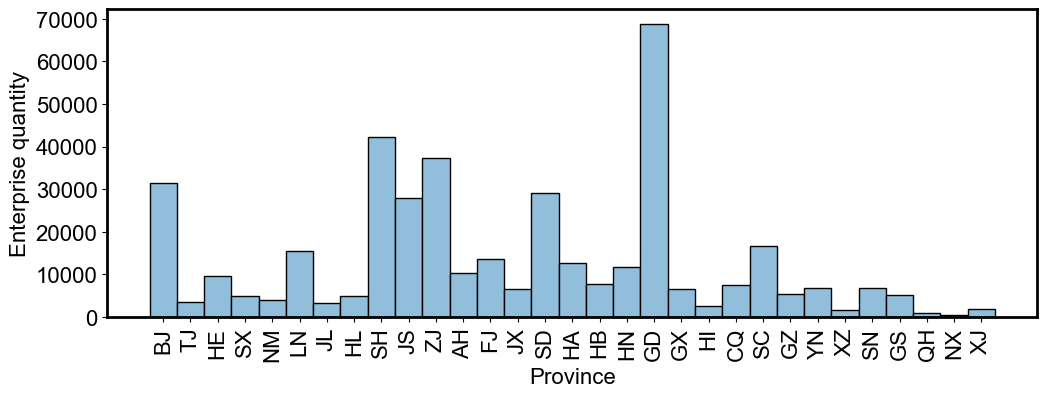

In [9]:
plt.figure(figsize=(12,4))

plt.bar(sf, num_sf, width=1, edgecolor="black",color=['#91bfdb'])

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.xlabel('Province',fontsize=16)
plt.ylabel('Enterprise quantity',fontsize=16)
bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
plt.show()

In [10]:
all_com_sim=pd.DataFrame({'industry':industry,'area':area})
# all_com_sim
area_industry=[]
area_industryper=[]
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[str(j) for j in dm]
a=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R']

for i in dm:
    num=[]
    per=[]
    lst=all_com_sim[all_com_sim['area']==i]
    for j in a:
        num.append(lst['industry'].tolist().count(j))
        per.append(lst['industry'].tolist().count(j)/len(lst['industry'].tolist()))
    area_industry.append(num)
    area_industryper.append(per)

area_industry=np.array(area_industry)
area_industryper=np.array(area_industryper)

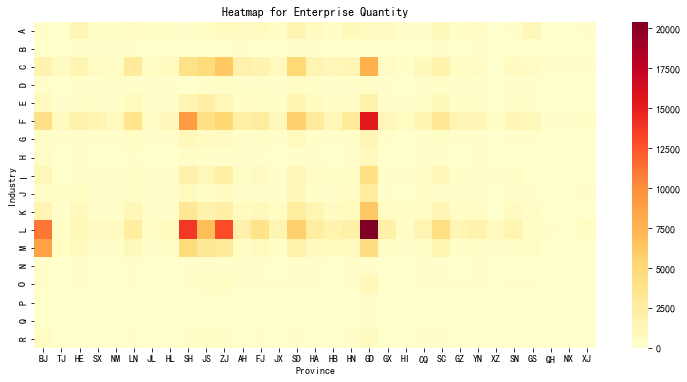

In [209]:
# province-industry

import seaborn as sns

plt.figure(figsize=(13,6))
value = area_industry.T
x_ticks = sf
y_ticks = a  
heatmap_area_industry = sns.heatmap(value, xticklabels=x_ticks, yticklabels=y_ticks, cmap="YlOrRd", square=True)
heatmap_area_industry.set_title('Heatmap for Enterprise Quantity')  
heatmap_area_industry.set_xlabel('Province')  
heatmap_area_industry.set_ylabel('Industry')
plt.show()

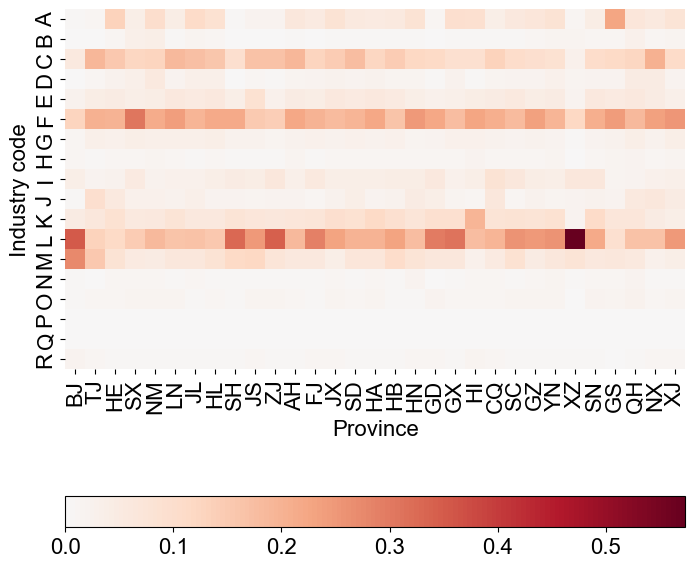

In [11]:
# proportion of enterprises in each industry

import seaborn as sns

plt.figure(figsize=(8,11))
value = area_industryper.T
x_ticks = sf
y_ticks = a  
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

h=sns.heatmap(value, xticklabels=x_ticks, yticklabels=y_ticks, cmap="RdBu_r",center=0, square=True,cbar=False) 
cb=h.figure.colorbar(h.collections[0],orientation='horizontal') 
cb.ax.tick_params(labelsize=16) 

h.set_xlabel('Province',fontsize=16)  
h.set_ylabel('Industry code',fontsize=16)
plt.show()

# investment quantity

In [12]:
ivst_num=testdata[['company_industry_code','company_area_code','invested_company_industry_code','invested_company_area_code']]
# print(ivst_num)
sf=['京','津','冀','晋','蒙','辽','吉','黑','沪','苏','浙','皖','闽','赣','鲁','豫','鄂','湘','粤','桂','琼','渝','川','贵','滇','藏','陕','甘','青','宁','新']
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[str(j) for j in dm]
ivstout_num=[0]*31
ivsted_num=[0]*31

for i in range(len(dm)):
    num1=0
    for j in ivst_num['company_area_code']:
        if str(j)[:2]==dm[i]:
            num1+=1
    ivstout_num[i]=num1

for i in range(len(dm)):
    num1=0
    for j in ivst_num['invested_company_area_code']:
        if str(j)[:2]==dm[i]:
            num1+=1
    ivsted_num[i]=num1
    
print(ivstout_num,ivsted_num)
print(sum(ivstout_num),sum(ivsted_num))

[32951, 2907, 7169, 3809, 2611, 11413, 2361, 3505, 33858, 20231, 30158, 7809, 10484, 4781, 21977, 9386, 6075, 9098, 54781, 4694, 2131, 5698, 12483, 3662, 4849, 1595, 5032, 4269, 727, 308, 1718] [23937, 2132, 7867, 3987, 3336, 12157, 2584, 3875, 32287, 20317, 30950, 8507, 10934, 5370, 23879, 10761, 6249, 10229, 52935, 5406, 1757, 6187, 13296, 4437, 5645, 1003, 5413, 4715, 897, 288, 1193]
322530 322530


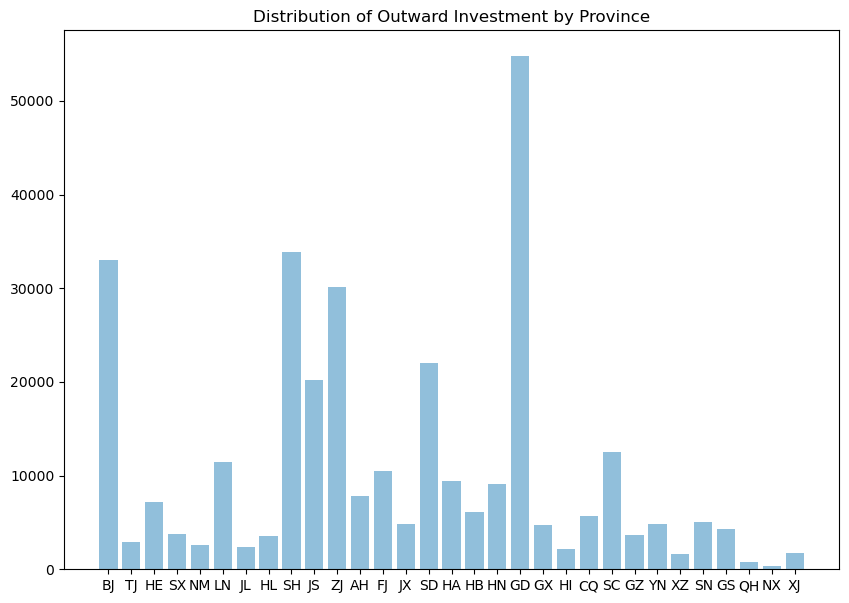

In [6]:
# outward investment

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sf=['BJ','TJ','HE','SX','NM','LN','JL','HL','SH','JS','ZJ','AH','FJ','JX','SD','HA','HB','HN','GD','GX','HI','CQ','SC','GZ','YN','XZ','SN','GS','QH','NX','XJ']
plt.bar(sf, ivstout_num, color=['#91bfdb'])
plt.title('Distribution of Outward Investment by Province')

plt.show()

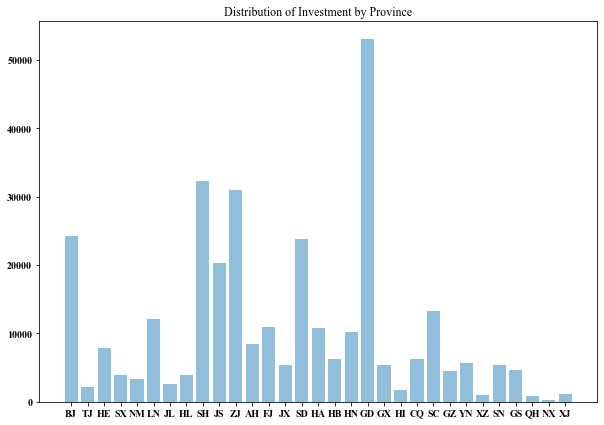

In [95]:
# inward investment

plt.figure(figsize=(10,7))
sf=['BJ','TJ','HE','SX','NM','LN','JL','HL','SH','JS','ZJ','AH','FJ','JX','SD','HA','HB','HN','GD','GX','HI','CQ','SC','GZ','YN','XZ','SN','GS','QH','NX','XJ']
plt.bar(sf, ivsted_num, color=['#91bfdb'])
plt.title('Distribution of Investment by Province')

plt.show()

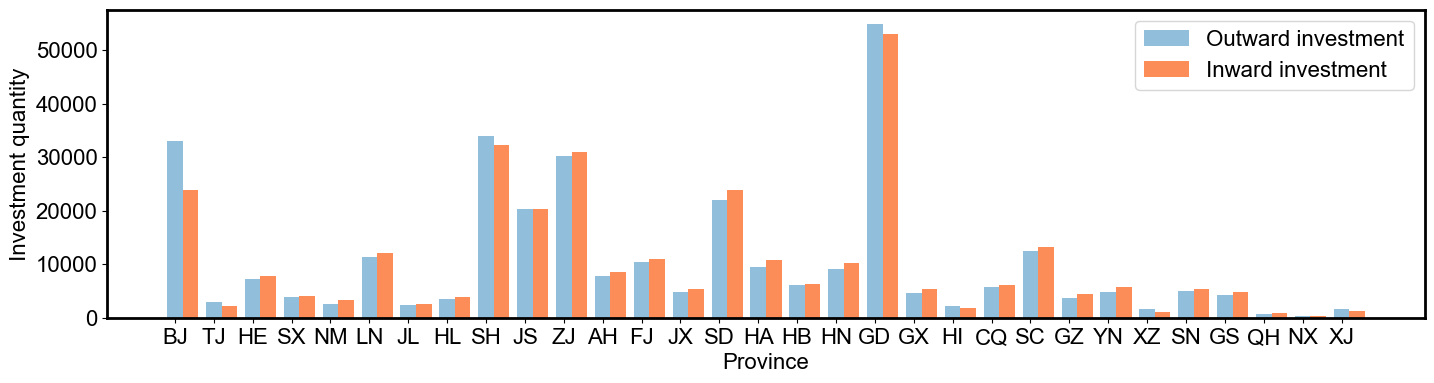

In [13]:
plt.figure(figsize=(17,4))

plt.rc('font',family='Arial')
sf=['BJ','TJ','HE','SX','NM','LN','JL','HL','SH','JS','ZJ','AH','FJ','JX','SD','HA','HB','HN','GD','GX','HI','CQ','SC','GZ','YN','XZ','SN','GS','QH','NX','XJ']
xlen=range(31)
plt.bar([i for i in xlen], ivstout_num, width=0.4, color=['#91bfdb'],label='Outward investment')
plt.bar([0.4+i for i in xlen], ivsted_num, width=0.4, color=['#fc8d59'],label='Inward investment')
plt.xticks(xlen,sf,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Province',fontsize=16)
plt.ylabel('Investment quantity',fontsize=16)
plt.legend(fontsize=16)
bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
plt.show()

In [14]:
# within provinces

area_area=[]
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[str(j) for j in dm]

area1=testdata['company_area_code'].tolist()
area1=[str(j) for j in area1]
for i in range(len(area1)):
    area1[i]=area1[i][:2]
    
area2=testdata['invested_company_area_code'].tolist()
area2=[str(j) for j in area2]
for i in range(len(area2)):
    area2[i]=area2[i][:2]

all_sim=pd.DataFrame({'company_area_code':area1,'invested_company_area_code':area2})
# all_sim

for i in dm:
    num=[]
    lst=all_sim[all_sim['company_area_code']==i]
    for j in dm:
        num.append(list(lst['invested_company_area_code']).count(j))
    area_area.append(num)

area_area=np.array(area_area)
area_area

array([[16393,   258,   966,   254,   427,   659,   224,   297,  1510,
          894,  1218,   370,   594,   310,  1445,   813,   449,   554,
         2057,   271,   129,   428,   762,   255,   326,   182,   374,
          273,   121,    41,    97],
       [  351,  1556,    97,    13,    29,    65,    14,    25,   117,
           44,    68,    12,    28,    25,    91,    50,    13,    19,
          135,     7,    14,    22,    41,    13,    13,    12,    15,
            7,     4,     1,     6],
       [  323,    26,  6065,    46,    48,    73,    11,    12,    51,
           37,    39,    18,    20,     8,    90,    40,    16,    19,
          108,    16,     2,     6,    24,    11,    17,     6,    20,
           13,     1,     2,     1],
       [  121,     6,    32,  3320,    24,    13,     2,     2,    58,
           15,    24,     3,     8,     2,    42,     9,     5,     9,
           47,     3,     6,     3,    10,     5,     6,     4,    26,
            1,     1,     1,     1],


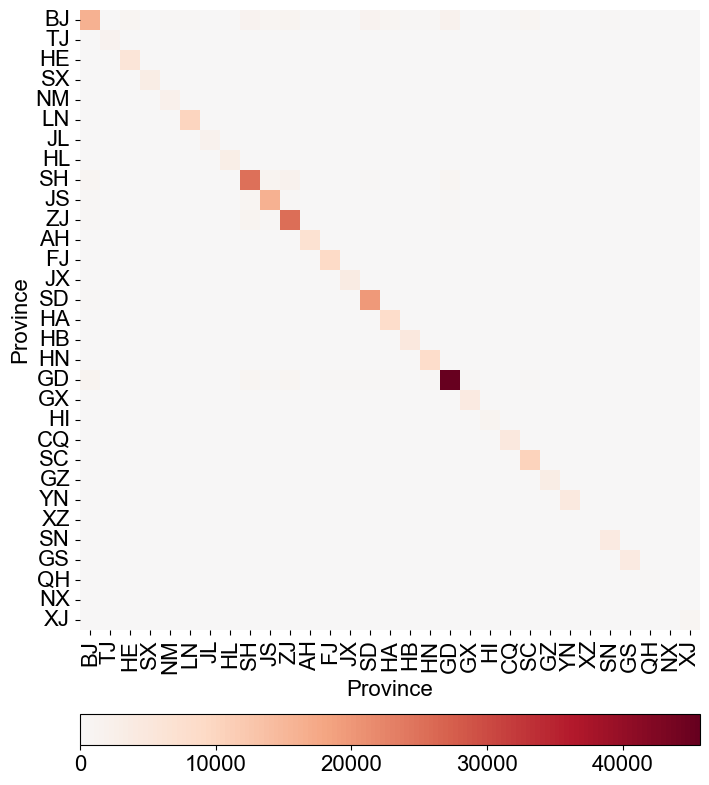

In [15]:
import seaborn as sns

plt.figure(figsize=(8,11))
value = area_area
x_ticks = sf
y_ticks = sf  
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

heatmap_area_industry=sns.heatmap(value, xticklabels=x_ticks, yticklabels=y_ticks, cmap="RdBu_r",center=0,square=True,cbar=False) 
cb_area_industry=heatmap_area_industry.figure.colorbar(heatmap_area_industry.collections[0],orientation='horizontal',pad=0.1) 
cb_area_industry.ax.tick_params(labelsize=16)

heatmap_area_industry.set_xlabel('Province',fontsize=16) 
heatmap_area_industry.set_ylabel('Province',fontsize=16)
plt.show()

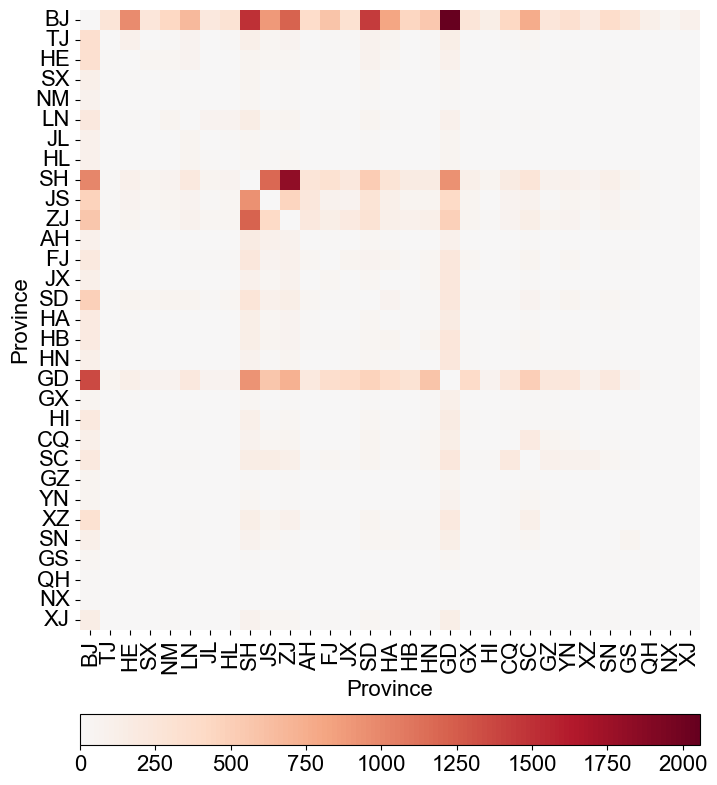

In [16]:
# deleting investment in the same province

row, col = np.diag_indices_from(area_area)
area_area[row,col] = 0

plt.figure(figsize=(8,11))
value = area_area
x_ticks = sf
y_ticks = sf  
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

heatmap_area_industry=sns.heatmap(value, xticklabels=x_ticks, yticklabels=y_ticks, cmap="RdBu_r",center=0,square=True,cbar=False) 
cb_area_industry=heatmap_area_industry.figure.colorbar(heatmap_area_industry.collections[0],orientation='horizontal',pad=0.1) 
cb_area_industry.ax.tick_params(labelsize=16) 

heatmap_area_industry.set_xlabel('Province',fontsize=16)  
heatmap_area_industry.set_ylabel('Province',fontsize=16)
plt.show()

In [17]:
# outward investment province-industry

dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[str(j) for j in dm]
a=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R']

indus1=testdata['company_industry_code'].tolist()
indus1=[str(j) for j in indus1]
for i in range(len(indus1)):
    indus1[i]=indus1[i][:1]
    
indus2=testdata['invested_company_industry_code'].tolist()
indus2=[str(j) for j in indus2]
for i in range(len(indus2)):
    indus2[i]=indus2[i][:1]

all_sim_n=pd.DataFrame({'company_industry_code':indus1,'invested_company_industry_code':indus2})
all_sim_n=pd.concat([all_sim_n,all_sim],axis=1)
# all_sim_n

area_industry_ivstout=[]
for i in dm:
    num=[]
    lst=all_sim_n[all_sim_n['company_area_code']==i]
    for j in a:
        num.append(list(lst['company_industry_code']).count(j))
    area_industry_ivstout.append(num)

area_industry_ivstout=np.array(area_industry_ivstout)
area_industry_ivstout

array([[  194,    70,  1843,   350,   908,  3330,   342,   157,  1125,
          945,  1382, 15053,  6537,   101,   101,    17,    20,   476],
       [   18,    17,   507,    48,   115,   552,   103,    10,    68,
          380,   168,   470,   382,     5,    26,     2,     2,    34],
       [  932,    77,  1060,   104,   341,  1525,   205,    39,   116,
          686,   550,   926,   471,    51,    50,     1,     9,    26],
       [  107,   124,   407,   104,   144,  1399,   140,    23,   171,
          139,   165,   614,   158,    34,    50,     2,     1,    26],
       [  193,    92,   299,   108,   121,   608,    87,    33,    53,
          116,   128,   559,    91,    31,    69,     2,     2,    19],
       [  373,    95,  2078,   219,   618,  2777,   456,   103,   278,
          406,   737,  2320,   634,    71,   137,     3,    13,    95],
       [  245,    23,   335,    55,   131,   467,    66,    11,    59,
          114,    97,   552,   134,    29,    17,     1,     0,    24],

In [18]:
# inward investment province-industry

area_industry_ivsted=[]
for i in dm:
    num=[]
    lst=all_sim_n[all_sim_n['invested_company_area_code']==i]
    for j in a:
        num.append(list(lst['invested_company_industry_code']).count(j))
    area_industry_ivsted.append(num)

area_industry_ivsted=np.array(area_industry_ivsted)
area_industry_ivsted

array([[  131,    56,  1463,   161,   710,  2885,   279,   245,  1222,
          812,  1292,  7152,  6595,   156,   147,    20,    58,   553],
       [   22,    16,   492,    24,   105,   417,    87,    20,    31,
          193,   161,   196,   311,     8,    21,     1,     2,    25],
       [ 1090,    70,  1170,   223,   294,  1212,   242,    85,   175,
          949,   662,   832,   652,    77,    67,     6,    20,    41],
       [  183,   169,   513,   157,   145,  1131,   183,    46,   204,
          204,   209,   506,   175,    56,    62,     3,    10,    31],
       [  346,   137,   451,   210,   131,   636,   122,    36,    64,
          213,   167,   525,   170,    44,    47,     1,     6,    29],
       [  555,    94,  2355,   249,   703,  2728,   452,   169,   384,
          452,  1013,  1771,   791,    90,   172,     8,    38,   132],
       [  301,    40,   532,   106,   109,   406,    77,    13,    70,
          177,   179,   358,   147,    32,    14,     1,     1,    21],